Copyright (c) Microsoft Corporation. All rights reserved.

Licensed under the MIT License.

# <font color = "blue"> Read the commentary in the note book to follow, especially pay attention to </font> <font color ="red"> Red Text in "Action Required" Cells </font>

# How to use Jupyter
In this workshop we will be using Jupyter notebooks hosted by Azure Notebooks Service. If you are familiar with Jupyter, skip this. If not, here are a few tips

>* Select the Kernet Python 3.6
>* Jupyter has 'cells'. When you click on anywhere in the notebook, the cell containing the pointer gets selected.
>* To run or execute the code in the cell - on the top menu select Cell->Run Cells. Alternatively you can use 'Shift+Enter' keys.
>* To Edit cell - Double click the cell
>* When you run a cell, the pointer pointing just outside on the left side of the cell will change from [] to [*] (inserts * in the square brackets). When the cell finished executing the '*' changes to a number.
>* If the notebook or cell hangs, select from the top menu Kernel->Restart & Clear output for the entire notebook or Kernel->Interrupt for just that cell. Restart will take a few seconds and you would need to reexecute all the cells.
>* In Jupyter you do not need to execute in sequence. You can go back to a previous cell that was already executed and execute again. As long as there are no dependencies that messes up the code in that particular cell, you will be fine.

# Automated Machine Learning: Energy Demand Forecasting
In this example, we show how auomated ML can be used for energy demand forecasting. This notebook is for demonstration purpose only.

## Use case overview:

This scenario focuses on energy demand forecasting where the goal is to predict the future load on an energy grid. It is a critical business operation for companies in the energy sector as operators need to maintain the fine balance between the energy consumed on a grid and the energy supplied to it. Too much power supplied to the grid can result in waste of energy or technical faults. However, if too little power is supplied it can lead to blackouts, leaving customers without power. Typically, grid operators can take short-term decisions to manage energy supply to the grid and keep the load in balance. An accurate short-term forecast of energy demand is therefore essential for the operator to make these decisions with confidence.

This scenario details the construction of a machine learning energy demand forecasting solution. The solution is trained on a public dataset from the New York Independent System Operator (NYISO), which operates the power grid for New York State. The dataset includes hourly power demand data for New York City over a period of five years. An additional dataset containing hourly weather conditions in New York City over the same time period was taken from darksky.net.

In this notebook you would perform

</n><font color = "blue"> Sections 0 through 2: By the end of section 2, you would have built a Machine Learning model for the above dataset. </font>
0. Basic Setup: You would need to create an Azure Machine Learning workspace to start with. You can do that in Azure Portal or through SDK. The workspace can be shared with your team mates to collaborate on the scripts. You would create an workspace one time and run multiple experiments and build many models.

1. Prepare the data: Prepare the data for training.

2. Train an automated ML model: We will use Azure Notebooks to train models with automated ML generated pipeline parameters.

</n><font color = "blue"> Sections 3 through 4: Shows how to scale machine learning model building in the cloud. In the process, we will walk through some of the configuration parameters and controls you get with automated ML. </font>

3. Prepare the data for Cloud

4. Training Models using Azure Data Science Virtual Machine similar to section 2. However DSVM enables us to run many more runs

</n> <font color ="blue">Section 5, 6, 7 show post model building activities such as exploring all the models built by AutoML, testing the model etc. </font>

5. Explore the results Inspect various way to get all the models built, Many different model metrics

6. Testing the fitted model with some test data

7. Register the model for deployment and get ready for deployment into Azure Machine Learning model management and deployment hosting

</n> <font color ="blue">Section 8 is optional if you have time continue with these </font>
8. How do I use it when I leave this session and go back to my work / home(Local Setup)
9. Training the model using Azure BatchAI

# Section 0
In this section, an automated machine learning (automl) Experiment and a Project Folder where all the configuration files are written are setup.

## 0.1 Create Experiment

First we will verify you have the latest SDK and update if needed. 

As part of the setup we will create a <b>Workspace</b>.An Azure ML workspace is an Azure resource that organizes and coordinates the actions of many other Azure resources to assist in executing and sharing machine learning workflows. In particular, an Azure ML workspace coordinates storage, databases, and compute resources providing added functionality for machine learning experimentation, operationalization, and the monitoring of operationalized models.
<p>
For AutoML you would need to create an <b>Experiment</b>. An <b>Experiment</b> is a named object in a <b>Workspace</b>, which is used to run experiments. The <b>resource group</b> name. 
<p>
The resource group organizes Azure resources and provides a default region for the resources in the group. The resource group will be created if it doesn't exist. Resource groups can be created and viewed in the [Azure portal](https://portal.azure.com)

In [1]:
import azureml.core
print("SDK Version:", azureml.core.VERSION)

SDK Version: 1.0.2


You <b>only</b> need to execute the cell <font color = "red"> <b>below</b></font> if you have SDK version less then 1.0.0

In [2]:
import sys
sys.executable

'/anaconda/envs/py36/bin/python'

In [3]:
!/anaconda/envs/py36/bin/pip show azureml.core

Name: azureml-core
Version: 1.0.2
Summary: UNKNOWN
Home-page: https://docs.microsoft.com/en-us/azure/machine-learning/service/
Author: Microsoft Corp
Author-email: None
License: https://aka.ms/azureml-sdk-license
Location: /data/anaconda/envs/py36/lib/python3.6/site-packages
Requires: jsonpickle, azure-storage-blob, azure-graphrbac, azure-storage-nspkg, six, azure-mgmt-keyvault, azure-common, requests, pathspec, ruamel.yaml, PyJWT, pytz, azure-cli-profile, azure-mgmt-authorization, msrestazure, contextlib2, cryptography, azure-mgmt-resource, ndg-httpsclient, docker, azure-storage-common, msrest, SecretStorage, backports.tempfile, azure-mgmt-storage, python-dateutil, azure-cli-core, azure-mgmt-containerregistry, urllib3
Required-by: azureml-train-widgets, azureml-train-core, azureml-train-automl, azureml-telemetry, azureml-sdk, azureml-pipeline-core, azureml-contrib-tensorboard, azureml-contrib-server, azureml-contrib-run, azureml-contrib-brainwave
You are using pip version 10.0.1, howe

In [5]:
!/anaconda/envs/py36/bin/pip install --upgrade azureml-train-automl==1.0.2

Requirement already up-to-date: azureml-train-automl==1.0.2 in /data/anaconda/envs/py36/lib/python3.6/site-packages (1.0.2)
Requirement not upgraded as not directly required: azureml-core==1.0.2.* in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-train-automl==1.0.2) (1.0.2)
Requirement not upgraded as not directly required: tensorflow>=1.10.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-train-automl==1.0.2) (1.12.0)
Requirement not upgraded as not directly required: sklearn-pandas<=1.7.0,>=1.4.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-train-automl==1.0.2) (1.7.0)
Requirement not upgraded as not directly required: azureml-dataprep<0.6.0,>=0.4.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-train-automl==1.0.2) (0.5.3)
Requirement not upgraded as not directly required: resource>=0.1.8 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-train-automl==1.0.2) (0.2.1)
Require

Requirement not upgraded as not directly required: keras-applications>=1.0.6 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorflow>=1.10.0->azureml-train-automl==1.0.2) (1.0.6)
Requirement not upgraded as not directly required: gast>=0.2.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorflow>=1.10.0->azureml-train-automl==1.0.2) (0.2.0)
Requirement not upgraded as not directly required: astor>=0.6.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorflow>=1.10.0->azureml-train-automl==1.0.2) (0.7.1)
Requirement not upgraded as not directly required: protobuf>=3.6.1 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorflow>=1.10.0->azureml-train-automl==1.0.2) (3.6.1)
Requirement not upgraded as not directly required: absl-py>=0.1.6 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorflow>=1.10.0->azureml-train-automl==1.0.2) (0.5.0)
Requirement not upgraded as not directly required: keras-preprocessi

Requirement not upgraded as not directly required: azure-cli-command-modules-nspkg>=2.0.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-profile>=2.0.26->azureml-core==1.0.2.*->azureml-train-automl==1.0.2) (2.0.2)
Requirement not upgraded as not directly required: werkzeug>=0.11.10 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorboard<1.13.0,>=1.12.0->tensorflow>=1.10.0->azureml-train-automl==1.0.2) (0.14.1)
Requirement not upgraded as not directly required: markdown>=2.6.8 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from tensorboard<1.13.0,>=1.12.0->tensorflow>=1.10.0->azureml-train-automl==1.0.2) (2.6.11)
Requirement not upgraded as not directly required: h5py in /data/anaconda/envs/py36/lib/python3.6/site-packages (from keras-applications>=1.0.6->tensorflow>=1.10.0->azureml-train-automl==1.0.2) (2.8.0)
Requirement not upgraded as not directly required: setuptools in /data/anaconda/envs/py36/lib/python3.6/site-packages (from p

In [6]:
!/anaconda/envs/py36/bin/pip install --upgrade azureml-sdk[explain]

Requirement already up-to-date: azureml-sdk[explain] in /data/anaconda/envs/py36/lib/python3.6/site-packages (1.0.2)
Requirement not upgraded as not directly required: azureml-core==1.0.2.* in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-sdk[explain]) (1.0.2)
Requirement not upgraded as not directly required: azureml-pipeline==1.0.2.* in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-sdk[explain]) (1.0.2)
Requirement not upgraded as not directly required: azureml-train==1.0.2.* in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-sdk[explain]) (1.0.2)
Requirement not upgraded as not directly required: azureml-explain-model==1.0.2.*; extra == "explain" in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-sdk[explain]) (1.0.2)
Requirement not upgraded as not directly required: docker in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azureml-core==1.0.2.*->azureml-sdk[explain]) (3.5.0)
Requirement not 

Requirement not upgraded as not directly required: pip in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-core>=2.0.38->azureml-core==1.0.2.*->azureml-sdk[explain]) (10.0.1)
Requirement not upgraded as not directly required: knack==0.4.2 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-core>=2.0.38->azureml-core==1.0.2.*->azureml-sdk[explain]) (0.4.2)
Requirement not upgraded as not directly required: paramiko>=2.0.8 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-core>=2.0.38->azureml-core==1.0.2.*->azureml-sdk[explain]) (2.4.2)
Requirement not upgraded as not directly required: wheel==0.30.0 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-core>=2.0.38->azureml-core==1.0.2.*->azureml-sdk[explain]) (0.30.0)
Requirement not upgraded as not directly required: antlr4-python3-runtime in /data/anaconda/envs/py36/lib/python3.6/site-packages (from azure-cli-core>=2.0.38->azureml-core==1.0.2.*->azureml-

Requirement not upgraded as not directly required: decorator in /data/anaconda/envs/py36/lib/python3.6/site-packages (from ipython->shap<=0.25.2,>=0.20.0->azureml-explain-model==1.0.2.*; extra == "explain"->azureml-sdk[explain]) (4.3.0)
Requirement not upgraded as not directly required: pickleshare in /data/anaconda/envs/py36/lib/python3.6/site-packages (from ipython->shap<=0.25.2,>=0.20.0->azureml-explain-model==1.0.2.*; extra == "explain"->azureml-sdk[explain]) (0.7.4)
Requirement not upgraded as not directly required: simplegeneric>0.8 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from ipython->shap<=0.25.2,>=0.20.0->azureml-explain-model==1.0.2.*; extra == "explain"->azureml-sdk[explain]) (0.8.1)
Requirement not upgraded as not directly required: prompt-toolkit<2.0.0,>=1.0.15 in /data/anaconda/envs/py36/lib/python3.6/site-packages (from ipython->shap<=0.25.2,>=0.20.0->azureml-explain-model==1.0.2.*; extra == "explain"->azureml-sdk[explain]) (1.0.15)
Requirement not upgra

In [9]:
import azureml.core
import logging
import os
import random
import numpy as np
import pandas as pd
import time

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from sklearn import datasets
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
from azureml.train.automl.run import AutoMLRun

### <font color="red">Action Required</font>

<font color="red"> Replace "subscription_guid" with your Azure Subscription. "resource_group", "workspace_region", and "workspace_name" with the values that you would like for this automl experiment. Make sure you remove the angle brackets. The values should be inside the quotes. </font>
* Supported regions include `eastus2`, `eastus`,`westcentralus`, `southeastasia`, `westeurope`, `australiaeast`, `westus2`, `southcentralus`

In [10]:
#Update your with your subscription, resrouce group, workspace region and workspace name.
subscription_id = "1bf784f2-dfbf-465a-83e8-2058cdfe5e3b"
resource_group = "AutoMLTutorial"
workspace_region = "westus2"
workspace_name = "EnergyDemandForecasting"

## Creating a Workspace
If you already have access to an Azure ML workspace you want to use, you can skip this cell.  Otherwise, this cell will create an Azure ML workspace for you in the specified subscription, provided you have the correct permissions for the given `subscription_id`.

This will fail when:
1. The workspace already exists.
2. You do not have permission to create a workspace in the resource group.
3. You are not a subscription owner or contributor and no Azure ML workspaces have ever been created in this subscription.

If workspace creation fails for any reason other than already existing, please work with your IT administrator to provide you with the appropriate permissions or to provision the required resources.

**Note:** Creation of a new workspace can take several minutes.

In [6]:
# Import the Workspace class and check the Azure ML SDK version.
from azureml.core import Workspace

ws = Workspace.create(name = workspace_name,
                      subscription_id = subscription_id,
                      resource_group = resource_group, 
                      location = workspace_region)
ws.get_details()

{'id': '/subscriptions/1bf784f2-dfbf-465a-83e8-2058cdfe5e3b/resourceGroups/AutoMLTutorial/providers/Microsoft.MachineLearningServices/workspaces/EnergyDemandForecasting',
 'name': 'EnergyDemandForecasting',
 'location': 'westus2',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'workspaceid': '49dfec23-2e2e-476a-bd86-300bbf3482b1',
 'description': '',
 'friendlyName': 'EnergyDemandForecasting',
 'creationTime': '2018-12-15T17:17:09.3731254+00:00',
 'containerRegistry': '/subscriptions/1bf784f2-dfbf-465a-83e8-2058cdfe5e3b/resourcegroups/automltutorial/providers/microsoft.containerregistry/registries/energydeacruuaoybhu',
 'keyVault': '/subscriptions/1bf784f2-dfbf-465a-83e8-2058cdfe5e3b/resourcegroups/automltutorial/providers/microsoft.keyvault/vaults/energydekeyvaultdfoenjzf',
 'applicationInsights': '/subscriptions/1bf784f2-dfbf-465a-83e8-2058cdfe5e3b/resourcegroups/automltutorial/providers/microsoft.insights/components/energydeinsightszzcthgah',
 'identityPrincipalId': 'fa3d

### <font color="red"> Action Required
    
<font color="red"> Executing next cell will ask you to go to a url to authenticate. Follow the instructions and copy and paste the code given. 
<p> Ensure to delete any white space after pasting the code. Once the authentication is successful, you will see a message that says Interactive authentication successfully completed and you can close the tab. 
<p> In this step you are logging into the Azure subscription using your credentials </font>

In [11]:
ws = Workspace(workspace_name = workspace_name,
               subscription_id = subscription_id,
               resource_group = resource_group)

Performing interactive authentication. Please follow the instructions on the terminal.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code BY978NCFY to authenticate.


Interactive authentication successfully completed.


In [12]:
# choose a name for the run history container in the workspace
experiment_name = 'AutoML_GlobalAI'

# project folder
project_folder = './sample_projects/automl-energydemandforecasting'

experiment=Experiment(ws, experiment_name)

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace Name'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data = output, index = ['']).T

,
SDK version,1.0.2
Subscription ID,1bf784f2-dfbf-465a-83e8-2058cdfe5e3b
Workspace Name,EnergyDemandForecasting
Resource Group,AutoMLTutorial
Location,westus2
Project Directory,./sample_projects/automl-energydemandforecasting
Experiment Name,AutoML_GlobalAI


# Section 1
In this section
Read and Inspect the dataset
and prepare the data for training

## 1.1 Read the data

Data is in a csv file in blob storage.
Two datasets are provided with this sample nyc_demand.csv and nyc_weather.csv.

>* nyc_demand.csv contains hourly energy demand values for New York City for the years 2012-2017. The data has timestamp and energy demand in megawatt-hours
>* nyc_weather.csv contains hourly weather values (nyc_weather.csv contains hourly weather values) for New York City over the same years 2012-2017.

The two datasets are joined and read into a pandas dataframe. Pandas is a popular dataframe extensively used by scikit-learn users

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
    
demand = pd.read_csv("https://antaignitedata.blob.core.windows.net/antaignitedata/nyc_demand.csv", parse_dates=['timeStamp'])
weather = pd.read_csv("https://antaignitedata.blob.core.windows.net/antaignitedata/nyc_weather.csv", parse_dates=['timeStamp'])
df = pd.merge(demand, weather, on=['timeStamp'], how='outer')


## 1.2 Inspect data
Display the first few rows of the data

In [14]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


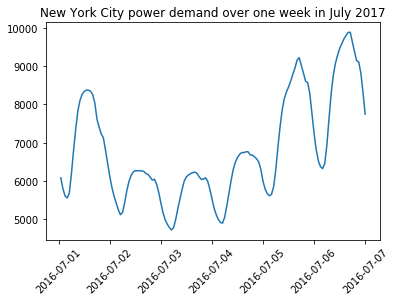

In [15]:
plt_df = demand.loc[(demand.timeStamp>'2016-07-01') & (demand.timeStamp<='2016-07-07')]
plt.plot(plt_df['timeStamp'], plt_df['demand'])
plt.title('New York City power demand over one week in July 2017')
plt.xticks(rotation=45)
plt.show()

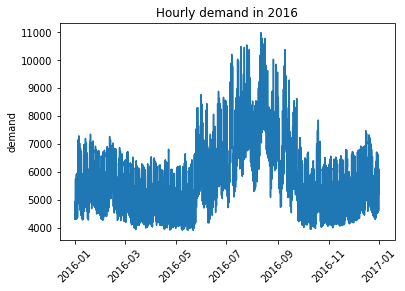

In [16]:
plt_df = demand.copy().loc[(demand['timeStamp']>='2016-01-01') & (demand['timeStamp']<'2017-01-01'), ]
plt.plot(plt_df['timeStamp'], plt_df['demand'], markersize=1)
plt.title('Hourly demand in 2016')
plt.ylabel('demand')
plt.xticks(rotation=45)
plt.show()

## 1.3 Set validation and test data aside

In [17]:
# We are setting aside data that is newer than 2017 August 1st as test data set. All the data that is older than 2017 August 1st is the training data

train, test = (df.loc[df['timeStamp']<'2016-07-01'], df.loc[df['timeStamp']>='2016-07-01'])

#Data that was read into the dataframe has the features and label (the column that you are trying to predict). 
#Moving the label column into its own vector y
X = train.drop(['demand'], axis=1)
y = train['demand'].values


#Set aside some validation dataset within the train dataset above. 
#With Timeseries data, typically validatation dataset is specific period
split_index = int(X.shape[0] * 0.9)
X_train = X[0:split_index]
y_train = y[0:split_index]
X_validation = X[split_index+1:]
y_validation = y[split_index+1:]


In [18]:
X.head()

,timeStamp,precip,temp
0,2012-01-01 00:00:00,0.0,46.13
1,2012-01-01 01:00:00,0.0,45.89
2,2012-01-01 02:00:00,0.0,45.04
3,2012-01-01 03:00:00,0.0,45.03
4,2012-01-01 04:00:00,0.0,42.61


In [19]:
y

array([4937.5, 4752.1, 4542.6, ...,    nan,    nan,    nan])

### Section 1 Recap
In the section above, you read the data and prepared the training vector, label vector and validation data

# Section 2
In this section
You will configure automated ML and run automated ML Experiment which will generate Machine Learning Models. The training jobs are run on VMs provided and managed by Azure Notebooks.

## 2.1 - Configure automated ML

AutoMLConfig has many levers that you can use to configure automated ML. Key ones to look for primary_metric, iterations.

### <font color="red"> Action Required </font> 
<font color="red"> automated ML comes with many levers that you can use to configure. This is to give you flexibility and control.
<p>
For example primary_metric is the metric that automated ML use to optimize the machine leanring model it is building. Automated ML supports several different primary_metrics. We will be using for <primary_metric>  <b> normalized_root_mean_squared_error </b> for this regression task. 
</font>
<p>
To find out more about all the configuration settings refer to the configure your automated machine learning experiment Azure documentation https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-configure-auto-train
<p>
Notice that the task is set to regression. We are also passing the training dataset and validation dataset (X_train, y-train, X_validation, y_validation that we prepared in section 1.3

In [16]:
automl_config_local = AutoMLConfig(task = 'regression',
                             debug_log = 'automl_errors.log',
                             primary_metric = 'normalized_root_mean_squared_error',
                             experiment_timeout_minutes = 30,
                             iterations = 5,
                             verbosity = logging.INFO,
                             X = X_train, 
                             y = y_train,
                             X_valid = X_validation,
                             y_valid = y_validation,
                             preprocess = True,
                             path=project_folder)

### Section 2.2 Training the Model on Azure Notebooks

You can call the submit method on the experiment object and pass the AutoMLConfig object you instantiated above. 
<P>
Submit generates the machine learning models equivalent to the iterations you set (In this case two different models). 
For Local runs the execution is synchronous. Depending on the data and number of iterations this can run for while. 
    
<p> For this data, this takes about 2 minutes to complete the iterations. Given Azure Notebooks is a multi-tenant service with so many users running at the same time, today you might see a little degradation in performance and completion could take a little longer.

You will see the currently running iterations printing to the console.

In [17]:
local_run = experiment.submit(automl_config_local, show_output=True)

Parent Run ID: AutoML_964b68a9-0452-445c-a07f-c937b2ad0280
*******************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
*******************************************************************************************

 ITERATION   PIPELINE                                       DURATION      METRIC      BEST
         0   StandardScalerWrapper DecisionTree             0:00:11       0.0635    0.0635
         1   StandardScalerWrapper ElasticNet               0:00:11       0.1071    0.0635
         2   MaxAbsScaler LightGBM                          0:00:10       0.0302    0.0302
         3   StandardScalerWrapper RandomForest             0:00:12       0.0581    0.0302
         4    Ensemble                      

## Retrieve the Best Model
Below we select the best pipeline from our iterations. The get_output method on automl_classifier returns the best run and the fitted model for the last fit invocation. There are overloads on get_output that allow you to retrieve the best run and fitted model for any logged metric or a particular iteration.

In [18]:
best_run, fitted_model = local_run.get_output()
print(best_run)
print(fitted_model)

Run(Experiment: AutoML_GlobalAI,
Id: AutoML_964b68a9-0452-445c-a07f-c937b2ad0280_4,
Type: None,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingregressor', PreFittedSoftVotingRegressor(estimators=[('LightGBM', Pipeline(memory=None,
     steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('lightgbmregressor', <automl.client.core.common.model_wrappers.LightGBMRegressor object at 0x7fe178f254e0>)]))],
               flatten_transform=None, weights=[1.0]))])


## Best Model 's explanation
Retrieve the explanation from the best_run. And explanation information includes:
1. shap_values: The explanation information generated by shap lib
2. expected_values: The expected value of the model applied to set of X_train data.
3. overall_summary: The model level feature importance values sorted in descending order
4. overall_imp: The feature names sorted in the same order as in overall_summary
5. per_class_summary: The class level feature importance values sorted in descending order. Only available for the classification case
6. per_class_imp: The feature names sorted in the same order as in per_class_summary. Only available for the classification case

In [ ]:
from azureml.train.automl.automlexplainer import explain_model

shap_values, expected_values, overall_summary, overall_imp, per_class_summary, per_class_imp = \
    explain_model(fitted_model, X_train, X_validation)

print(overall_summary)
print(overall_imp)

### Section 2 Recap
In the section above, you configured automated ML object and ran automated ML Experiment locally on Azure Notebooks which built two ML models. With this section you have successfully completed building your Machine Learning model using automated ML.

# Section 3
We have built a couple of models using Azure Notebooks. Now, lets scale to Cloud. In order to run automated ML training jobs in the cloud, we need to prepare the data similar to what we have done in section 1. However, you write the data preparation in a script and write the script to a file. This enables automated ML to upload the script file to the cloud machine and execute in the cloud eliminating the need to transfer the data for every iteration.

## 3.1 Define Get Data function and write it to a file
When running on Azure cloud, A get_data function needs to be defined for your data fetch. This function is written to a file called get_data.py. This file gets copied to the BatchAI cluster VMs and gets executed on the VM. The *get_data()* function returns a [dictionary](README.md#getdata).

In [19]:
%%writefile $project_folder/get_data.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

def get_data():
    
    demand = pd.read_csv("https://antaignitedata.blob.core.windows.net/antaignitedata/nyc_demand.csv", parse_dates=['timeStamp'])
    weather = pd.read_csv("https://antaignitedata.blob.core.windows.net/antaignitedata/nyc_weather.csv", parse_dates=['timeStamp'])
    df = pd.merge(demand, weather, on=['timeStamp'], how='outer')

#    df = df.dropna(axis=0, how='all', subset = ['demand'])
#    df[np.isnan(df.demand)]
    
    train, test = (df.loc[df['timeStamp']<'2016-07-01'], df.loc[df['timeStamp']>='2016-07-01'])

    X = train.drop(['demand'], axis=1)
    X.head()
    type(X)
    y = train['demand']
    y = y.values
    type(y)
    #X = X.values
    type(X)
    
    split_index = int(X.shape[0] * 0.9)
    X_train = X[0:split_index]
    y_train = y[0:split_index]
    X_validation = X[split_index+1:]
    y_validation = y[split_index+1:]

    return { "X" : X_train, "y" : y_train, "X_valid": X_validation, "y_valid" : y_validation }

Overwriting ./sample_projects/automl-energydemandforecasting/get_data.py


# Section 4
In this section, you run the automated ML experiment in Azure Cloud using a data science virtual machine (DSVM). Azure Cloud compute enables you to scale to run lot more iterations.

First let's use Data Science Virtual Machine in Azure to run automated ML training jobs

You may have noticed the performance metric of the models created above is still very low. Automated ML recommends to run greater than 100 iterations to get a decent model.

## 4.1 Creating a DSVM or using an existing VM.
A data science VM will now be created and provisioned for you. Data Science VM enables you to scale up and run AutoML experiment much faster. <p>This process will take a few minutes.

In [40]:
from azureml.core.compute import DsvmCompute
import time 

dsvm_name = 'MyMLCompute'
try:
    dsvm_compute = DsvmCompute(ws, dsvm_name)
    print('Found an existing DSVM.')
except:
    print('Creating a new DSVM.')
    dsvm_config = DsvmCompute.provisioning_configuration(vm_size = "Standard_D2_v2")
    dsvm_compute = DsvmCompute.create(ws, name = dsvm_name, provisioning_configuration = dsvm_config)
    dsvm_compute.wait_for_completion(show_output = True)
    time.sleep(60)

Found an existing DSVM.


## 4.2 Configure AutoMLConfig for DSVM. 
The differences from the local config are - set compute_target as the DSVM, pass the get_data.py script.

In [22]:
#DSVM AI AutoML Settings

automl_config_dsvm = AutoMLConfig(task = 'regression',
                             debug_log = 'automl_errors.log',
                             primary_metric = 'normalized_root_mean_squared_error',
                             iterations = 3,
                             verbosity = logging.INFO,
                             path = project_folder,
                             compute_target=dsvm_compute,
                             data_script = project_folder + "/get_data.py"
                            )

## 4.3 Training the Model on DSVM

You can call the submit method on the experiment object. For DSVM the runs execute asynchronously. 

In [23]:
remote_dsvm_run = experiment.submit(automl_config_dsvm, show_output = False)

## 4.4 - Monitor and Inspect the runs

#### Widget for monitoring runs

Initial run could take a few minutes. Depending on the data and number of iterations this can run for while.
You will see the currently running iterations printing in the widget. The widget will sit on "loading" until the first iteration completed, then you will see an auto-updating graph and table show up. It refreshed once per minute, so you should see the graph update as child runs complete.

NOTE: The widget displays a link at the bottom. Ignore the link for a moment. This links to a web-ui to explore the individual run details.

### <font color = "red"> Action Required </font>
<font color = "red"> When the widget loads you will notice that the two runs failed. This is expected. Click on any of the failed links under Pipeline column. A pop-up window will open. Notice the second line from the bottom in the popup window.  </font>

By the way, the blue bar in the widget might be displaying Waiting for metrics. Ignore that. If you see AttributeError, you can ignore that too (We are running more than a month's old version of SDK on Azure Notebooks and the bug has been fixed in the newer version of SDK).

In [24]:
from azureml.widgets import RunDetails
RunDetails(remote_dsvm_run).show() 

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'NOTSET', …

## 4.5 Training the Model on DSVM with Preprocess

Noticed that the experiment failed. This is because the data has missing values. For example let's check the values on row 49175 in the dataframe. Notice that there is "nan" in the values. nan stands for 'Not a Number' which basically means the value is missing. Missing values is quite common in real life. For example if you are collecting data from IoT sensors, there could be a period where one of the sensors is broken.

In [25]:
df.iloc[49175].values

array([Timestamp('2017-08-11 01:00:00'), nan, 0.0, 69.26], dtype=object)

With automated ML's data preprocessing you don't need to worry about missing values. automated ML will replace the missing values. Preprocessing can do lot more than just missing values, including one hot encoding of categorical values.
<p> Let's configure AutoMLConfig by setting preprocess to True

In [41]:
#DSVM AI AutoML Settings

automl_config_dsvm = AutoMLConfig(task = 'regression',
                             debug_log = 'automl_errors.log',
                             primary_metric = 'normalized_root_mean_squared_error',
                             iterations = 150,
                             verbosity = logging.INFO,
                             preprocess = True,
                             path = project_folder,
                             compute_target=dsvm_compute,
                             data_script = project_folder + "/get_data.py"
                            )

#### Submit automated ML Experiment of 5 runs to be executed on DSVM

In [42]:
remote_dsvm_run = experiment.submit(automl_config_dsvm, show_output = False)

## 4.6 - Monitor and Inspect the runs

### <font color = "red"> Action Required </font> 
<font color = "red"> When you execute the cell below, it will render a widget showing the status of all the iterations in a table. The iterations are shown in a leaderboard format with the best performing model being on the top. However you can sort these by clicking on the column heading. If you hover your mouse on any of the pipelines, you will see all the hyper parameters used to build that particular model. If you click on any of the pipelines, a window will popup with a plethora of information including various metrics of the model and a few visual charts. 
You will also see a step chart showing the metric for each iteration </font>

In [ ]:
from azureml.widgets import RunDetails
RunDetails(remote_dsvm_run).show() 

## 4.7 Continue with a couple of more iterations
 Lets run two more iterations to see whether there is any improvement in accuracy

In [ ]:
remote_dsvm_run.continue_experiment(X = X, y = y, X_valid = X_validation, y_valid = y_validation, iterations=50, show_output=False)

### <font color = "red">  Action Required 
<font color = "red"> Click on the link that says "Link to Azure Portal" in the output of cell above. You will notice that there are a total of 7 runs now (5 original and 2 more with the continue)

### Section 4 Recap - 

You have built a Machine Learning model by running your training jobs on a Data Science Virtual Machine.

Automated machine learning also provides an option to run on BatchAI cluster. With BatchAI cluster you can setup a cluster of virtual machines and run iterations in parallel. The cluster is "managed" cluster with autoscale functionality. When jobs are completed executing, the VMs get shutdown saving you money. Section 9 shows sample code on how to setup a BatchAI cluster and run on BatchAI. BatchAI is may perform slower than DSVM for the first run.


# Section 8 - Setting up on your local machine

Visit https://github.com/Azure/MachineLearningNotebooks and go to <b> How to use Azureml > Automated Machine Learning </b> folder. Here you file instructions to setup a local python environment. Click on Readme file. Once on the readme file, go to the section that says "Running samples in a Local conda environment". Follow the instructions starting with "1. Install mini-conda form here......."

The repro contains also many more sample notebooks.



# Section 9 - Using AML Compute for training
In this section, you run the AutoML experiment in Azure Cloud using Managed Compute (BatchAI). Azure Cloud compute enables you to scale to run lot more iterations. You may have noticed the performance metric of the models created above is still very low. AutoML recommends to run greater than 100 iterations to get a decent model.

## 9.1 Create and provision a AML Compute cluster
BatchAI enables you to create a cluster of Virtual Machines that can autoscale. With this you can run AutoML runs in parallel. 

You will need to create a [compute target](https://docs.microsoft.com/azure/machine-learning/service/concept-azure-machine-learning-architecture#compute-target) for your AutoML run. In this tutorial, you create `AmlCompute` as your training compute resource.

**Creation of AmlCompute takes approximately 5 minutes.** If the AmlCompute with that name is already in your workspace this code will skip the creation process.

As with other Azure services, there are limits on certain resources (e.g. AmlCompute) associated with the Azure Machine Learning service. Please read [this article](https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-manage-quotas) on the default limits and how to request more quota.


In [45]:
from azureml.core.compute import AmlCompute
from azureml.core.compute import ComputeTarget

# Choose a name for your cluster.
amlcompute_cluster_name = "MyMLCompute"

found = False
# Check if this compute target already exists in the workspace.
cts = ws.compute_targets
if amlcompute_cluster_name in cts and cts[amlcompute_cluster_name].type == 'AmlCompute':
    found = True
    print('Found existing compute target.')
    compute_target = cts[amlcompute_cluster_name]
    
if not found:
    print('Creating a new compute target...')
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = "STANDARD_D2_V2", # for GPU, use "STANDARD_NC6"
                                                                #vm_priority = 'lowpriority', # optional
                                                                max_nodes = 6)

    # Create the cluster.
    compute_target = ComputeTarget.create(ws, amlcompute_cluster_name, provisioning_config)
    
    # Can poll for a minimum number of nodes and for a specific timeout.
    # If no min_node_count is provided, it will use the scale settings for the cluster.
    compute_target.wait_for_completion(show_output = True, min_node_count = None, timeout_in_minutes = 20)
    
     # For a more detailed view of current AmlCompute status, use the 'status' property.

Found existing compute target.


In [46]:
from azureml.core.runconfig import RunConfiguration
from azureml.core.conda_dependencies import CondaDependencies

# create a new RunConfig object
conda_run_config = RunConfiguration(framework="python")

# Set compute target to AmlCompute
conda_run_config.target = compute_target
conda_run_config.environment.docker.enabled = True
conda_run_config.environment.docker.base_image = azureml.core.runconfig.DEFAULT_CPU_IMAGE

cd = CondaDependencies.create(pip_packages=['azureml-sdk[automl]'], conda_packages=['numpy'])
conda_run_config.environment.python.conda_dependencies = cd

## 9.2 Configure AutoMLConfig for AML Compute. 
The differences from the local config are - set compute_target as the BatchAI cluster, pass the get_data.py script.
Notice that you can set concurrent_iterations which will run iterations in parallel (one iteration per node)

In [52]:
#AML Compute AutoML Settings

automl_config_batch = AutoMLConfig(task = 'regression',
                             debug_log = 'automl_errors.log',
                             primary_metric = 'normalized_root_mean_squared_error',
                             iterations = 200,
                             max_concurrent_iterations = 5,
                             verbosity = logging.INFO,
                             preprocess = True,
                             path = project_folder,
                             compute_target=compute_target,
                             data_script = project_folder + "/get_data.py"
                            )

## 9.3 Training the Model on AML Compute

You can call the submit method on the experiment object. For AML compute runs the execution is asynchronous. Initial run could take about 20 minutes as the docker image is being created and setup on the batch cluster node. Depending on the data and number of iterations this can run for while.

In [53]:
remote_run = experiment.submit(automl_config_batch, show_output = False)

## Explore the Results

#### Loading executed runs
In case you need to load a previously executed run, enable the cell below and replace the `run_id` value.

In [20]:
remote_run = AutoMLRun(experiment = experiment, run_id = 'AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125')

#### Widget for Monitoring Runs

The widget will first report a "loading" status while running the first iteration. After completing the first iteration, an auto-updating graph and table will be shown. The widget will refresh once per minute, so you should see the graph update as child runs complete.

You can click on a pipeline to see run properties and output logs.  Logs are also available on the DSVM under `/tmp/azureml_run/{iterationid}/azureml-logs`

**Note:** The widget displays a link at the bottom. Use this link to open a web interface to explore the individual run details.

In [21]:
remote_run

Experiment,Id,Type,Status,Details Page,Docs Page
AutoML_GlobalAI,AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125,automl,Completed,Link to Azure Portal,Link to Documentation


In [23]:
from azureml.widgets import RunDetails
RunDetails(remote_run).show() 

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'NOTSET', …

In [24]:
# Wait until the run finishes.
remote_run.wait_for_completion(show_output = True)


*******************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
*******************************************************************************************

 ITERATION   PIPELINE                                       DURATION      METRIC      BEST
         0   StandardScalerWrapper LightGBM                 0:00:49       0.0307    0.0307
         1   MinMaxScaler ExtremeRandomTrees                0:08:48       0.0767    0.0307
         2   StandardScalerWrapper LightGBM                 0:06:29       0.0483    0.0307
         3   RobustScaler RandomForest                      0:06:20       0.0579    0.0307
         4   MinMaxScaler ExtremeRandomTrees                0:06:13       0.0853    0.0307
         5 

        84   StandardScalerWrapper RandomForest             0:00:29       0.0385    0.0264
        85   StandardScalerWrapper LightGBM                 0:00:39       0.0319    0.0264
        86   StandardScalerWrapper RandomForest             0:01:00       0.0350    0.0264
        87   RobustScaler LightGBM                          0:00:28       0.0314    0.0264
        88   StandardScalerWrapper LightGBM                 0:00:34       0.0604    0.0264
        89   MaxAbsScaler RandomForest                      0:00:43       0.0512    0.0264
        90   SparseNormalizer ExtremeRandomTrees            0:00:35       0.0378    0.0264
        91   SparseNormalizer RandomForest                  0:00:39       0.0530    0.0264
        92   RobustScaler RandomForest                      0:00:33       0.0453    0.0264
        93   StandardScalerWrapper ExtremeRandomTrees       0:00:34       0.0587    0.0264
        94   MaxAbsScaler GradientBoosting                  0:00:33       0.0349    0.0264

{'runId': 'AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125',
 'target': 'MyMLCompute',
 'status': 'Completed',
 'startTimeUtc': '2018-12-15T18:43:56.649347Z',
 'endTimeUtc': '2018-12-15T19:17:28.400005Z',
 'properties': {'num_iterations': '100',
  'training_type': 'TrainFull',
  'acquisition_function': 'EI',
  'primary_metric': 'normalized_root_mean_squared_error',
  'train_split': '0',
  'max_time_seconds': '0',
  'acquisition_parameter': '0',
  'num_cross_validation': None,
  'target': 'MyMLCompute',
  'RawAMLSettingsString': "{'name': 'AutoML_GlobalAI', 'path': './sample_projects/automl-energydemandforecasting', 'subscription_id': '1bf784f2-dfbf-465a-83e8-2058cdfe5e3b', 'resource_group': 'AutoMLTutorial', 'workspace_name': 'EnergyDemandForecasting', 'iterations': 100, 'primary_metric': 'normalized_root_mean_squared_error', 'data_script': './sample_projects/automl-energydemandforecasting/get_data.py', 'compute_target': 'MyMLCompute', 'task_type': 'regression', 'validation_size': 0.0, 'n_

# Section 10 - Exploring the Remote Execution results and models


## 10.1 Retrieve All Remote Child Runs
You can also use sdk methods to fetch all the child runs and see individual metrics that we log for each of the models.

In [25]:
children = list(remote_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}    
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
explained_variance,0.940019,0.600861,0.828698,0.785629,0.515696,0.779345,0.332659,0.940267,0.910406,0.836996,...,0.913155,0.840029,0.871444,0.765469,0.910420,0.923696,0.884308,0.354816,0.899556,0.956131
mean_absolute_error,198.563688,529.311545,310.487459,375.877057,601.499129,368.440656,761.664205,198.758201,266.724324,355.793610,...,265.766971,358.860266,308.256459,411.410464,227.365440,221.078313,300.535677,670.093856,279.796885,153.865730
median_absolute_error,153.607182,451.203551,229.358836,301.814584,547.044006,283.292020,705.434610,162.471848,230.560705,307.564050,...,233.848625,292.428065,257.169002,367.673056,176.889849,162.361897,258.953311,573.025130,235.975025,111.838645
normalized_mean_absolute_error,0.023098,0.061574,0.036118,0.043725,0.069971,0.042860,0.088603,0.023121,0.031027,0.041389,...,0.030916,0.041745,0.035859,0.047858,0.026449,0.025718,0.034961,0.077951,0.032548,0.017899
normalized_median_absolute_error,0.017869,0.052488,0.026681,0.035109,0.063636,0.032955,0.082062,0.018900,0.026821,0.035778,...,0.027203,0.034018,0.029916,0.042771,0.020577,0.018887,0.030123,0.066659,0.027450,0.013010
normalized_root_mean_squared_error,0.030686,0.076654,0.048266,0.057879,0.085332,0.057379,0.107054,0.030185,0.038613,0.051282,...,0.037790,0.052968,0.045260,0.058693,0.034906,0.034698,0.043462,0.096879,0.040863,0.024819
normalized_root_mean_squared_error_min,0.000000,0.000000,0.000000,0.000000,0.000000,0.030686,0.030686,0.030185,0.030686,0.030686,...,0.026428,0.026428,0.026428,0.026428,0.026428,0.026428,0.026428,0.026428,0.026428,0.024819
normalized_root_mean_squared_log_error,0.030823,0.087784,0.051558,0.058763,0.096766,0.059476,0.117929,0.031151,0.042942,0.060004,...,0.042944,0.057823,0.051293,0.068141,0.038721,0.035353,0.049772,0.109342,0.044319,0.024953
r2_score,0.930721,0.567686,0.828600,0.753526,0.464265,0.757766,0.156808,0.932963,0.890302,0.806512,...,0.894928,0.793578,0.849285,0.746545,0.910353,0.911422,0.861020,0.309469,0.877149,0.954681
root_mean_squared_error,263.787737,658.952385,414.915403,497.554228,733.549584,493.255696,920.274970,259.485075,331.934914,440.840063,...,324.861246,455.336333,389.073908,504.551181,300.069815,298.275934,373.619956,832.810154,351.272522,213.351962


## 10.2  Retrieve different Models

### 10.21 Best Model based on the primary metric
Below we select the best pipeline from our iterations. The *get_output* method on experiment run object returns the best run and the fitted model for the last *fit* invocation. There are overloads on *get_output* that allow you to retrieve the best run and fitted model for *any* logged metric or a particular *iteration*.

In [26]:
best_run, fitted_model = remote_run.get_output()
print(best_run)
print(fitted_model)

Run(Experiment: AutoML_GlobalAI,
Id: AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125_99,
Type: azureml.scriptrun,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingregressor', PreFittedSoftVotingRegressor(estimators=[('GradientBoosting', Pipeline(memory=None,
     steps=[('standardscalerwrapper', <automl.client.core.common.model_wrappers.StandardScalerWrapper object at 0x...=None,
               weights=[0.5333333333333333, 0.2, 0.06666666666666667, 0.06666666666666667]))])


### 10.22 Best Model based on any other metric
Show the run and model that has the smallest `root_mean_squared_error` (which turned out to be the same as the one with largest `spearman_correlation` value):

In [27]:
lookup_metric = "root_mean_squared_error"
best_run, fitted_model = remote_run.get_output(metric=lookup_metric)
print(best_run)
print(fitted_model)

Run(Experiment: AutoML_GlobalAI,
Id: AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125_99,
Type: azureml.scriptrun,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingregressor', PreFittedSoftVotingRegressor(estimators=[('GradientBoosting', Pipeline(memory=None,
     steps=[('standardscalerwrapper', <automl.client.core.common.model_wrappers.StandardScalerWrapper object at 0x...=None,
               weights=[0.5333333333333333, 0.2, 0.06666666666666667, 0.06666666666666667]))])


### 10.23 Best Model based on any iteration
Simply show the run and model from the 2nd iteration from the local run:

In [28]:
iteration = 1
second_run, second_model = remote_run.get_output(iteration = iteration)
print(second_run)
print(second_model)

Run(Experiment: AutoML_GlobalAI,
Id: AutoML_da0c3ce5-269c-4c83-93b9-1dd34cb59125_1,
Type: azureml.scriptrun,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('extratreesregressor', ExtraTreesRegressor(bootstrap=True, criterion='mae', max_depth=None,
          max_features='log2', max_leaf_nodes=None,
          min_impurit...timators=200, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False))])


# Section 11 - Testing the Model

### Testing the Fitted Model

Predict on training and test set, and calculate residual values.

In [43]:
train_na_mean = train.fillna(train.mean())
train_na_interpolate = train.interpolate()

In [47]:
test_na_mean = test.fillna(train.mean())
test_na_interpolate = test.interpolate()

In [74]:
my_train = train_na_interpolate
my_test = test_na_interpolate

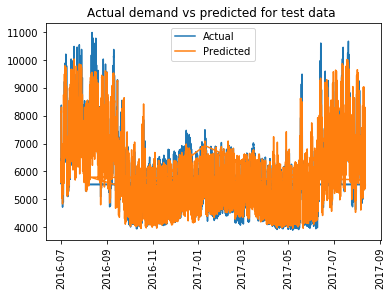

In [75]:
x_train = my_train.drop(['demand'], axis=1)
y_train = my_train['demand']

y_pred_train = fitted_model.predict(x_train.values)
y_residual_train = y_train - y_pred_train

x_test = my_test.drop(['demand'], axis=1)
y_test = my_test['demand']
y_pred_test = fitted_model.predict(x_test.values)
y_residual_test = y_test - y_pred_test

plt.plot(x_test['timeStamp'], y_test, label='Actual')
plt.plot(x_test['timeStamp'], y_pred_test, label="Predicted")
plt.xticks(rotation=90)
plt.title('Actual demand vs predicted for test data ')
plt.legend()
plt.show()

# Section 12 -  Register fitted model for deployment

In [76]:
description = 'AutoML Model for Electric Demand'
tags = None
remote_run.register_model(description = description, tags = tags)
print(remote_run.model_id) # Use this id to deploy the model as a web service in Azure

Registering model AutoMLda0c3ce52best
AutoMLda0c3ce52best
